# 4. Exploratory Data Analysis(EDA)

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비
- 데이터 그 자체만으로부터 인사이트를 얻는 접근법
- 시각화, 통계적 수치, numpy/pandas의 container를 사용

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# 데이터 불러오기
titanic_df = pd.read_csv("train.csv")

## 1. 분석의 목적과 변수 확인

kaggle-titanic에서 변수의 정의 및 key 확인
- Tip: NaN: Not a Number

In [4]:
# 상위 5개 에티어 확인하기
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
## 각 Column의 데이터 타입 확인하기
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [6]:
## 데이터 전체 정보를 얻는 함수: .describe()
titanic_df.describe()   # 수치형 데이터에 대한 요약만을 제공한다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Correlation is NOT Causation
- 상관성: A up, B up, ...
- 인과성: A -> B

In [7]:
## 상관계수(Correlation)

titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


__결측치를 어떻게 처리하냐 중요하다!!__

In [8]:
## 결측치(Missing Value) 확인
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### ⅰ. Survived Column

In [9]:
## 생존자, 사망자 명수는?
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\Jinsub Park\jupyter_project\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


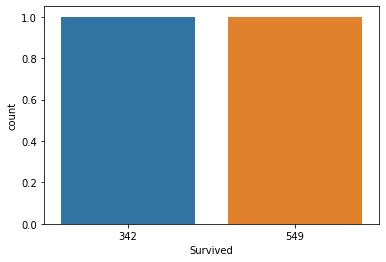

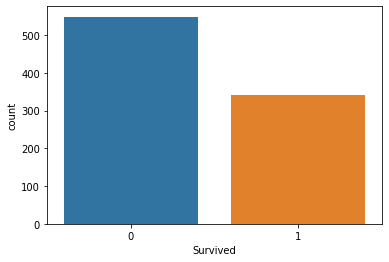

In [10]:
## 생존자와 사망자수를 Barplot으로 그리기
sns.countplot(titanic_df['Survived'].value_counts()) # 직접하면 error
plt.show()

# 아래와 같이 x축과 data를 표시해주자!
sns.countplot(x='Survived', data=titanic_df)
plt.show()

### ⅱ. Pclass

In [11]:
# Pclass에 따른 인원 파악
titanic_df.loc[:][['Pclass', 'Survived']]
#  or
titanic_df[['Pclass', 'Survived']].head(3)  # index는 column을 나타내므로 바로 쓰면 된다.

,Pclass,Survived
0,3,0
1,1,1
2,3,1


In [12]:
titanic_df_Pclass = titanic_df[['Pclass', 'Survived']].groupby(['Pclass'])
titanic_df_Pclass.sum()

,Survived
Pclass,
1,136
2,87
3,119


In [13]:
# 이름 바꾸기 및 전체 인원수 count
# 방법1
titanic_df_Pclass.count().rename(columns={"Survived": "Numbers_People"})

# 방법2
titanic_df_Pclass_count = titanic_df_Pclass.count()
titanic_df_Pclass_count.columns = ['Numbers_People']
titanic_df_Pclass_count

,Numbers_People
Pclass,
1,216
2,184
3,491


In [14]:
# 두 식 모두 결과는 동일하다.
# 1.np.array의 element-wise divisino
titanic_df_Pclass.sum() / titanic_df_Pclass.count()

# 2. pandas의 mean
titanic_df_Pclass.mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:ylabel='Pclass'>

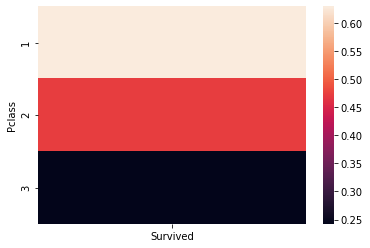

In [15]:
# 히트맵 활용
sns.heatmap(titanic_df_Pclass.mean())

### ⅲ Sex

In [16]:
titanic_df[['Sex', 'Survived']].head(3)

,Sex,Survived
0,male,0
1,female,1
2,female,1


In [17]:
# groupby 테크닉: 기준이 2가지
titanic_df.groupby(['Survived', 'Sex'])[['Survived']].count()

Survived
Survived Sex             
0        female        81
         male         468
1        female       233
         male         109

In [18]:
# 참고하기 [[]]와 []의 차이
print(type(titanic_df[['Survived']]))
type(titanic_df['Survived'])

<class 'pandas.core.frame.DataFrame'>


pandas.core.series.Series

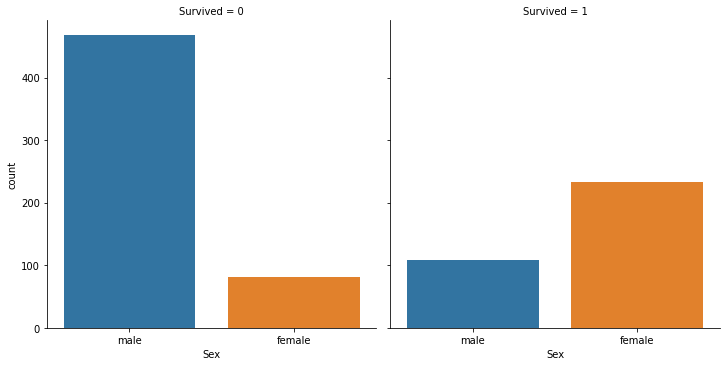

In [19]:
# sns.catplot
sns.catplot(x="Sex", col="Survived", kind='count', data=titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

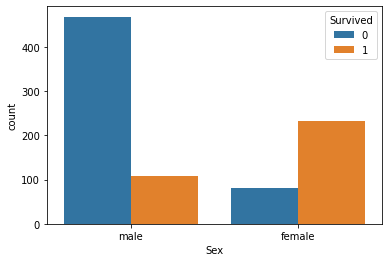

In [20]:
# countplot으로의 표현 방식
sns.countplot(x="Sex", hue="Survived", data=titanic_df)

### ⅳ Age
Remind: 결측치 존재

In [21]:
titanic_df.describe()[['Age']]

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [22]:
titanic_df[titanic_df.Survived == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

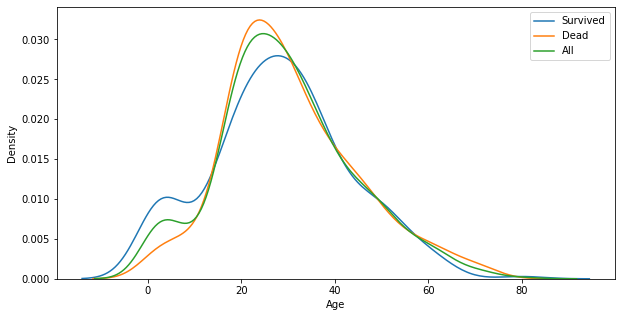

In [23]:
## Survived 1, 0과 age의 경향성

# 구조: figure -> axis -> plot

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'], ax=ax)
sns.kdeplot(x=titanic_df['Age'], ax=ax)

plt.legend(["Survived", "Dead", "All"])
plt.show()

### Appendix Ⅰ. Sex + Pclass vs Survived

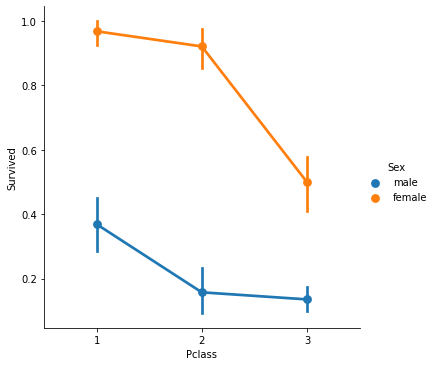

In [24]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)

### Appendix Ⅱ. Age + Pclass

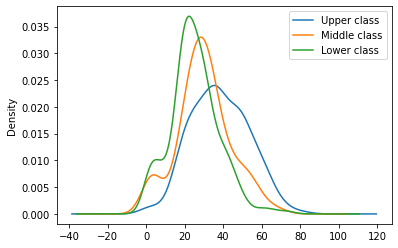

In [25]:
## Age graph with Pclass
# [] 순서를 바꿔도 상관없나??
# 빠르게 그려주기
titanic_df[titanic_df.Pclass == 1]['Age'].plot(kind='kde')
titanic_df[titanic_df.Pclass == 2]['Age'].plot(kind='kde')
titanic_df[titanic_df.Pclass == 3]['Age'].plot(kind='kde')
plt.legend(["Upper class", "Middle class", "Lower class"])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?


### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

__day4 과제로 Mission1만 했습니다. mission2는 따로 제출하겠습니다.__

# 분석: Survived와 Cabin(누락, 비누락)의 관계
- Cabin의 의미: 강의에서는 승무원 번호라고 하셨지만, 조사해보니 객실번호를 의미합니다.
- Cabin data는 NaN(누락된 값)이 정말 많다. 따라서 누락된 사람들의 생존율과 cabin number가 알려진 승객들의 생존율에 유의미한 차이가 있는지 확인하였다
- Cabin data를 다루기 위해 누락된 값은 0으로, 누락되지 않은 경우는 1로 하여 비교해보았다

In [26]:
# 승무원이 아닌 사람 리스트
def is_nan(num):
    return num != num

titanic_df[is_nan(titanic_df["Cabin"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [27]:
# 승무원인 사람 리스트
titanic_df[is_nan(titanic_df["Cabin"]) == False]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [28]:
# 데이터 변환용 titanic_dfs
titanic_df2 = titanic_df.copy()

# 승무원 -> 1, 아니면 -> 0
titanic_df2.loc[is_nan(titanic_df2["Cabin"]) == False, "Cabin"] = 1
titanic_df2.loc[is_nan(titanic_df2["Cabin"]), "Cabin"] = 0

titanic_df2.groupby(["Survived", "Cabin"])[['Survived']].count()

Survived
Survived Cabin          
0        0           481
         1            68
1        0           206
         1           136

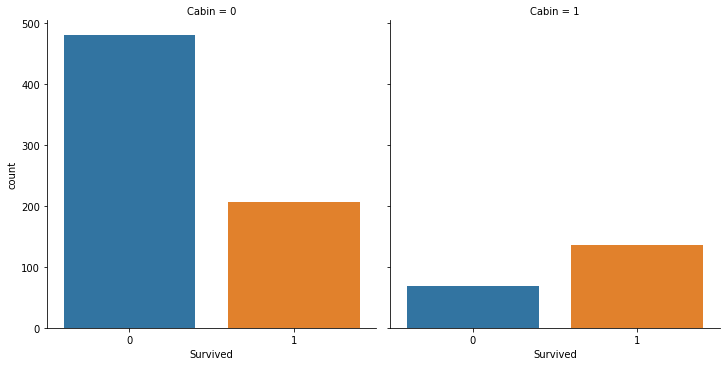

In [29]:
sns.catplot(x="Survived", col="Cabin", kind="count", data=titanic_df2)

# 분석 결론
- Survived: 0->dead 1->Survived
- Cabin: 0-> NaN, 1-> not NaN

전체를 봤을 때 사망률이 더 높았다.
하지만 Cabin Number가 누락되지 않은 승객들의 경우 생존자의 수가 사망자의 수보다 높았음을 알 수 있다.

그 이유를 추론하면, Cabin number가 누락되지 않았다는 것은 편지 등의 기록 또는 생존했기에 사고 이후의 조사에서 Cabin Number를 확인할 수 있었다고 판단된다.



In [31]:
titanic_df2.groupby(["Survived", "Cabin"]).count()

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Survived Cabin                                                              
0        0              481     481   481  481  364    481    481     481   
         1               68      68    68   68   60     68     68      68   
1        0              206     206   206  206  165    206    206     206   
         1              136     136   136  136  125    136    136     136   

                Fare  Embarked  
Survived Cabin                  
0        0       481       481  
         1        68        68  
1        0       206       206  
         1       136       134